<a href="https://colab.research.google.com/github/raciel88p/learning-pandas/blob/main/seriesdeTiempoPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip  install --upgrade pandas

In [ ]:
#ingresando a google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#incregasando a la ruta del archivo
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
'Copia de 4 datatypes.ipynb'   poblacion.gsheet
 covid_19_data.csv	       test.csv
'Funciones matemátcas.ipynb'   test.json
 london_merged.csv	       test.parquet
 london_merged.gsheet	       test.pickle
 Meteorite_Landings.csv        test.xlsx
 MultiplesIndices.ipynb        trabajandotextoenPandas.ipynb
 poblacion.csv


In [ ]:
import pandas as pd
pd.__version__

'1.3.5'

In [ ]:
#guardamos el archivo en una variable
df = pd.read_csv('covid_19_data.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
86097,86098,08/12/2020,Nenets Autonomous Okrug,Russia,2021-04-02 15:13:53,289.0,0.0,96.0
52612,52613,06/28/2020,Hong Kong,Hong Kong,2021-04-02 15:13:53,1199.0,7.0,1104.0
247419,247420,03/13/2021,Sumy Oblast,Ukraine,2021-04-02 15:13:53,50860.0,730.0,47097.0
242419,242420,03/07/2021,Callao,Peru,2021-04-02 15:13:53,59476.0,2515.0,0.0
71413,71414,07/24/2020,NaN,Antigua and Barbuda,2021-04-02 15:13:53,82.0,3.0,60.0
266989,266990,04/08/2021,Guainia,Colombia,2021-04-09 04:21:13,1339.0,22.0,1312.0
293156,293157,05/12/2021,Mordovia Republic,Russia,2021-05-13 04:20:51,20414.0,255.0,18299.0
121228,121229,09/28/2020,Piemonte,Italy,2021-04-02 15:13:53,35132.0,4161.0,28287.0
176581,176582,12/11/2020,NaN,Singapore,2021-04-02 15:13:53,58305.0,29.0,58192.0
60559,60560,07/09/2020,Bremen,Germany,2021-04-02 15:13:53,1691.0,54.0,1600.0


In [ ]:
#dando formato tipo tiempo
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [ ]:
#para visualizar la lista de columnas que tiene la base de datos
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [ ]:
#remplazar df por alguna de las columnas anteriores
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [ ]:
#creamos una variable de tiempo y agrupamos la columna observationDate y todos sus valores los vamos sumando
df_time = df.groupby('ObservationDate').sum()
df_time.head(10) #mostramos solo los 10 primeros
#tiemp queda como el indice del data frame, y lo que vemos los enfermaron, los muertos y los que se han curado

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
2020-01-27,2927.0,82.0,65.0
2020-01-28,5578.0,131.0,108.0
2020-01-29,6165.0,133.0,127.0
2020-01-30,8235.0,171.0,145.0


In [ ]:
#vamos a selecionar datos una muestra de datos
df1 = df_time['Confirmed'].iloc[10:15]
df1 


ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [ ]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [ ]:
#podemos hacer operaciones gracias al indice por fechas
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [ ]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [ ]:
#queremos ver ahora como dia tras dia va aumentando los casos de coronavirus
df_time.diff()
#diff resta cada dia con el dia previo y muestra el aumento de casos dia a dia

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [ ]:
df_time.diff().mean() #sacamos el promedio

Confirmed    344728.200811
Deaths         7167.549696
Recovered    217323.811359
dtype: float64

In [ ]:
#el primer valor de la varieble es nulo porque no tiene con quien restarse
df_diff = df_time.diff()
#vamos a completar la base de datos
df_diff 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [ ]:
#llamamos el elemneto de NaN  a modo de diccionario y llamamos
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [ ]:
#vamos a completar el valor faltante de NaN
df_diff = df_diff.fillna({'Confirmed': 557.0,
 'Deaths': 17.0,
 'Recovered': 30.0 })

df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [ ]:
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [ ]:
df_diff.resample('7d').sum()
#para hacer una estimacion estadistica a cada 7 dias y sobre este aplique la suma de los valores

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


In [ ]:
df_diff.resample('M').count()
#resample extrae valor estadistico segun un intervalo definido por nosotros, en caso de la M es en una frecuencia mensual

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [ ]:
#como trabajar con variable nulas e interpolar esos valores
#vamos a cambiar la frecuenca por una menor de 12 horas
df_cum = df_time.resample('12h').sum(min_count = 1)
#  y sobre esta vamos a sumar estos casos
#los datos 0 o los nulos no estan contenidos dentro del dataFrame
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
#vamos a tratar de completar todos esos datos nulos
df_cum.bfill()
#copia el valor siguiente en la celda anterior

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
df_cum.ffill()
#trae el valor previo para completar la tabla

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,557.0,17.0,30.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1097.0,34.0,60.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,168970791.0,3511297.0,106078106.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
df_cum.fillna(-250)# permite colocar el valor que usted quiera

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,-250.0,-250.0,-250.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,-250.0,-250.0,-250.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,-250.0,-250.0,-250.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
df_cum = df_cum.interpolate() #interpola los valores medios de una fila a otra, crea un valor medio de los registros diarios
df_cum #crea una interpolacion lineal

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [ ]:
#vamos a crear una nueva columna
df_cum ['tasa_supervivencia'] = 1- df_cum['Deaths']/df_cum['Confirmed']
df_cum = df_cum.reset_index() # reiniciar el indice
#contemplar si estraer data de la varialbe tipo tiempo es otra columna dentro del dataFrame
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,tasa_supervivencia
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


In [ ]:
#utlizar grupoby para agrupar Grouper que bueno para las variables tipo tiempo y vamos a llamar key observation date con una frecuencia Mensual y vamos valor trabajar con la columna tasa superviviencia para saber su valor promedio
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['tasa_supervivencia']].mean()
#vamos a calcular si la tasa de super vivencia a tenido una variacion

,tasa_supervivencia
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


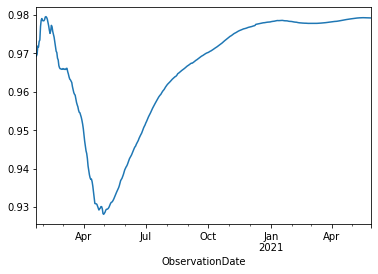

In [ ]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['tasa_supervivencia'].mean()
sr.plot() #plot permite generar graficos estadisticos

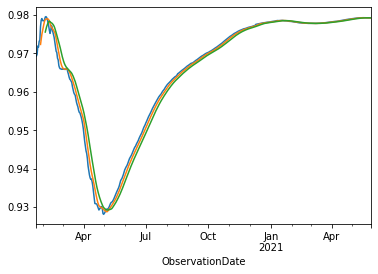

In [ ]:
sr.plot()
sr.rolling(window = 7).mean().plot()
sr.rolling(window = 14).mean().plot()

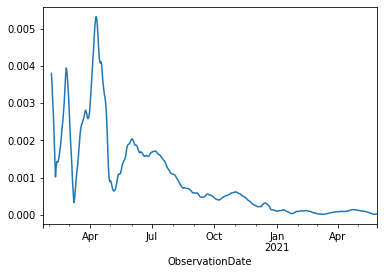

In [ ]:
#conocer como ha hido variando la desviacion estandar de
sr.rolling(window = 14).std().plot()

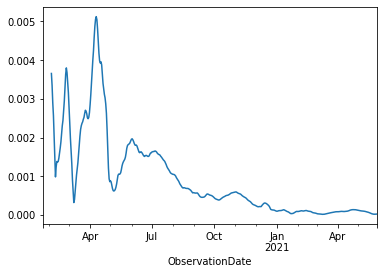

In [ ]:
import numpy as np
sr.rolling(window = 14).apply(lambda x: np.std(x)).plot()

In [ ]:
#mas elementos de visualizacion de datos
#cual es el pais con mas ocurrencias de covid existen
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [ ]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending = False)

Country/Region
France                   5863138.0
India                    5713215.0
Turkey                   5235978.0
UK                       3910803.0
US                       3788713.0
                           ...    
Micronesia                     1.0
North Ireland                  1.0
Republic of the Congo          1.0
 Azerbaijan                    1.0
China                          0.0
Name: Confirmed, Length: 229, dtype: float64

In [ ]:
#vamos a trabajar con  china
df_time = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq = '1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [ ]:
#llamamos a los datos del pais chino
df_china = df_time.loc['Mainland China',:]
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,1082.0,34.0,58.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
...,...,...,...
2021-05-25,91019.0,4636.0,86063.0
2021-05-26,91038.0,4636.0,86075.0
2021-05-27,91045.0,4636.0,86097.0


In [ ]:
#libreria para ejes
import matplotlib.pyplot as plt


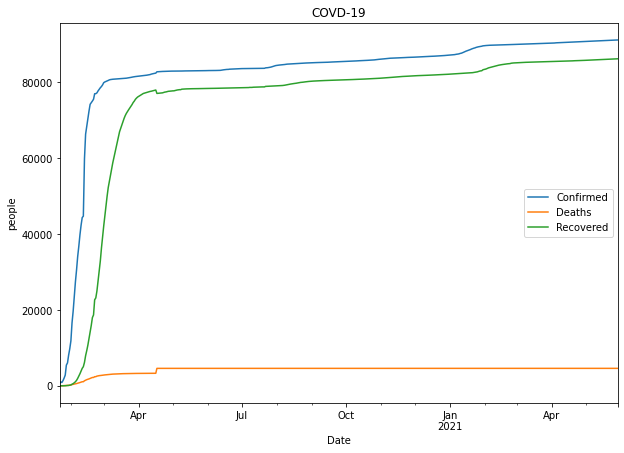

In [ ]:
#vamos a visualizarlo graficamente
df_china.plot(figsize = (10, 7), title= 'COVD-19')
plt.xlabel('Date')
plt.ylabel('people')
plt.show()

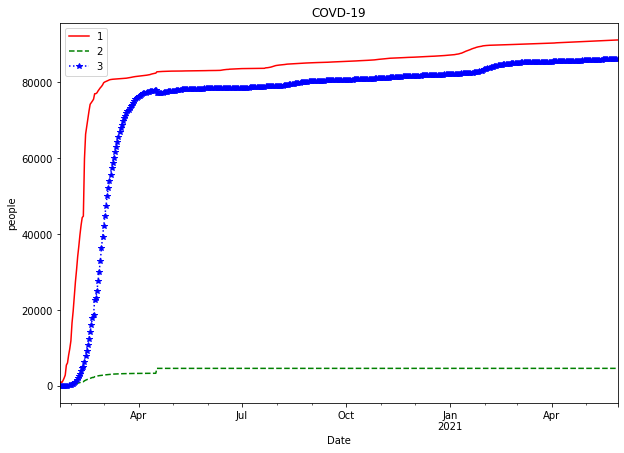

In [ ]:
#modifciamos los tipos de linea, colores y legenda que estaba definido en la grafica
ax =df_china.plot(figsize = (10, 7), title= 'COVD-19', legend = False, style = ['r-', 'g--', 'b:*'])
ax.legend(['1', '2', '3'])
plt.xlabel('Date')
plt.ylabel('people')
plt.show()

In [ ]:
df_montly = df_china.resample('M').max() #tomamos un valor mes a mes de su valor maxi de la observacion
df_montly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,81524.0,3305.0,76062.0
2020-04-30,82874.0,4633.0,77900.0
2020-05-31,83017.0,4634.0,78307.0
2020-06-30,83534.0,4634.0,78480.0
2020-07-31,84337.0,4634.0,78990.0
2020-08-31,85058.0,4634.0,80206.0
2020-09-30,85412.0,4634.0,80587.0


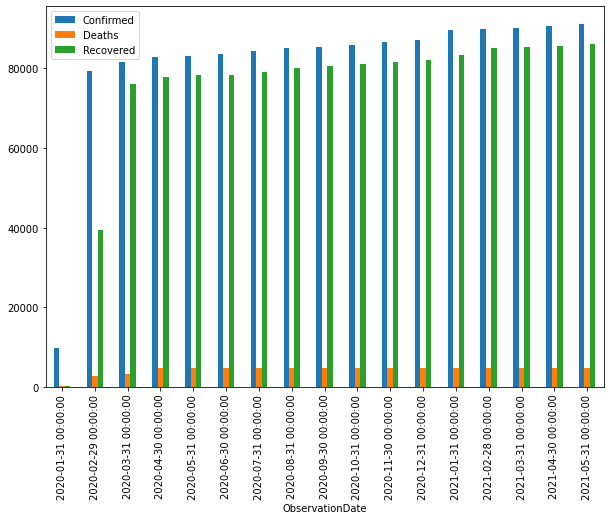

In [ ]:
df_montly.plot(kind='bar', figsize = (10, 7))
#vemos cada uno de las proporciones de los casos en China

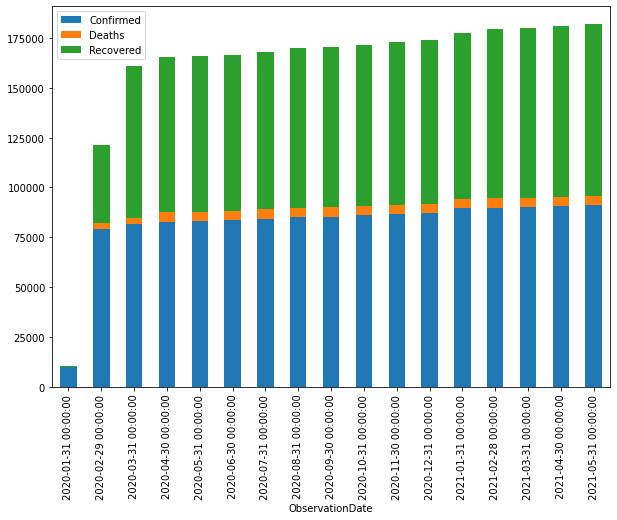

In [ ]:
#juntando todas las barras en una sola con el siguiente comando
df_montly.plot(kind='bar', figsize = (10, 7), stacked = True)

In [ ]:
#conocinedo la lista de columnas que se encuentra en el data frame
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [ ]:
#encontrando las personas que han  tenido tratamiento del coronavirus
df_montly['tratamiento'] = df_montly['Confirmed'] - df_montly['Deaths']  - df_montly['Recovered']
df_montly


,Confirmed,Deaths,Recovered,tratamiento
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,81524.0,3305.0,76062.0,2157.0
2020-04-30,82874.0,4633.0,77900.0,341.0
2020-05-31,83017.0,4634.0,78307.0,76.0
2020-06-30,83534.0,4634.0,78480.0,420.0
2020-07-31,84337.0,4634.0,78990.0,713.0
2020-08-31,85058.0,4634.0,80206.0,218.0
2020-09-30,85412.0,4634.0,80587.0,191.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9282896d10>,
      dtype=object)

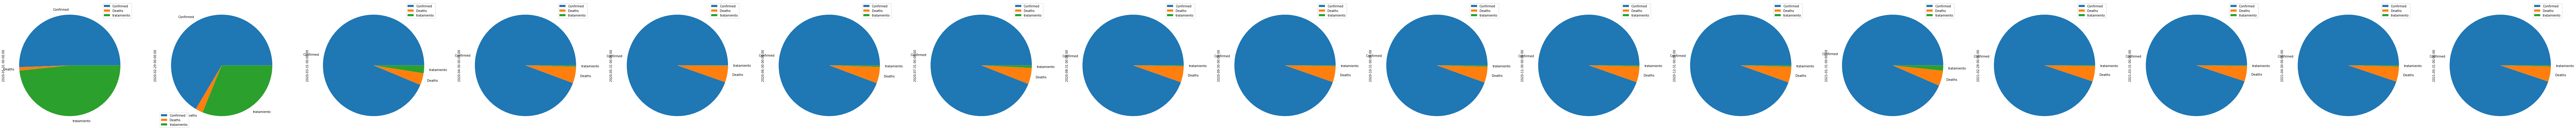

In [ ]:
#grafica de gente recuperada con un transpueta
df_montly[['Confirmed', 'Deaths','tratamiento']].T.plot(figsize = (150, 70), kind = 'pie', subplots = True)

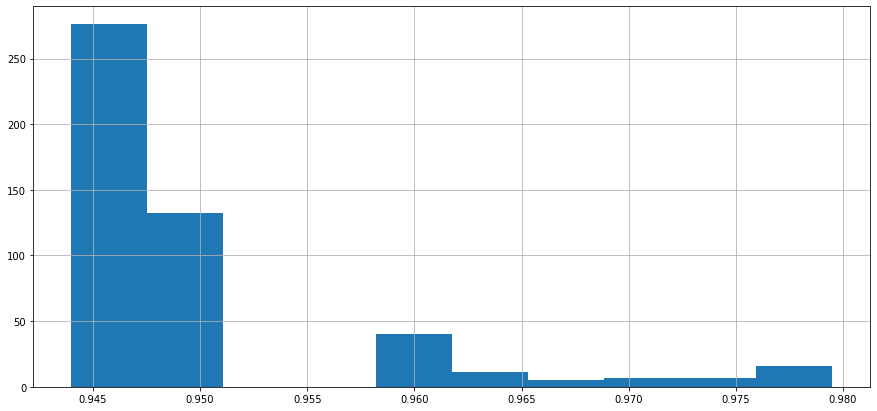

In [ ]:
#definimos nuevamente la variable de superviviencia
df_china['tasa_supervivencia'] = 1- df_china['Deaths'] / df_china['Confirmed']
#para ver un historia grama
df_china['tasa_supervivencia'].hist(figsize = (15, 7), bins = 10)

AttributeError: ignored

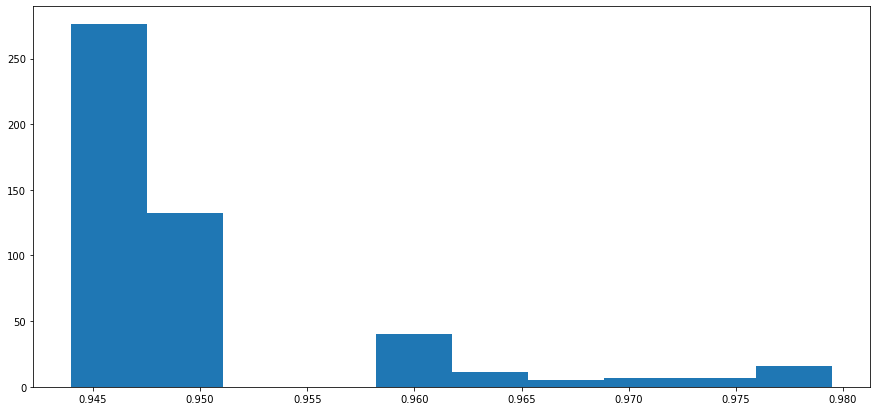

In [ ]:
df_china['tasa_supervivencia'].hist(figsize = (15, 7), bins = 10, normed = True)

In [ ]:
#definimos la variable de Costa Rica y todos sus datos
df_cr = df_time.loc['Costa Rica',:]
df_cr

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-06,1.0,0.0,0.0
2020-03-07,1.0,0.0,0.0
2020-03-08,5.0,0.0,0.0
2020-03-09,9.0,0.0,0.0
2020-03-10,9.0,0.0,0.0
...,...,...,...
2021-05-25,306899.0,3877.0,231319.0
2021-05-26,309486.0,3908.0,238971.0
2021-05-27,311922.0,3929.0,239917.0


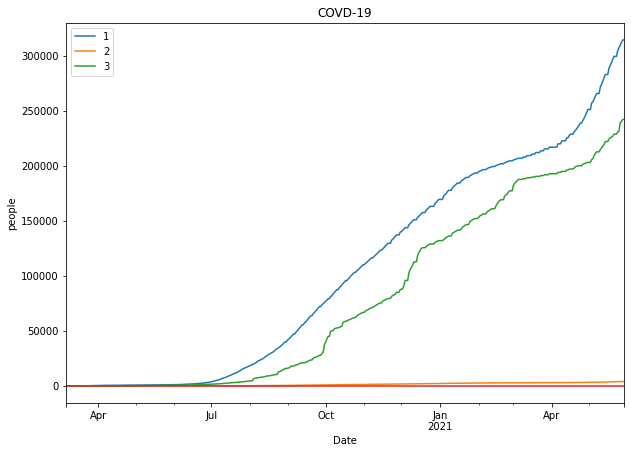

In [ ]:
#tasa de supervivencia en cr
df_cr ['tasa_supervivencia'] = 1- df_cr['Deaths'] / df_cr['Confirmed']
dato = df_cr.plot(figsize = (10, 7), title= 'COVD-19', legend = False)
dato.legend(['1', '2', '3'])
plt.xlabel('Date')
plt.ylabel('people')
plt.show()